<h1>The Battle of Neighborhoods - London</h1>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall.jpg/1280px-Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall.jpg' style='width:2080px;height:1024px'/>

<h2>Business Problem: Finding the best area to build a residential neighborhood in London</h2>

<h2>Date: March 20, 2020</h2>  

<h2>Introduction</h2>

<p>London is considered to be one of the world's most important global cities and has been called the world's most powerful, most desirable, most influential, most sustainable, most-popular-for-work-city, and most investement-
friendly. Also called the financial capital of the world, like any other major city, has its own issues. One of the issue is the crime rate. Crime rate vary by area ranging from parts with serious issues to parts considered vey
safe.</p>

<p> Today crime figures are made available nationally at Local Authority and Ward level. The Metropolitan Police have made detailed crime figure, broken down by category at borugh and ward level, available on their website since
2000. According to the data published by the Metropolitan Police in 2015 there were 118 homicides, a 25.5% increase over 2014. Recorded crime has been rising in London, notably violent crime and murder by stabbing and other 
means have risen. Only in 2018 there have been 50 murders from start to mid april.</p>

<p>Therefore one of the major concerns for future residents and real estate investement companies is the security factor. Safety of the area is an important point on the agenda of any real estate investor when it comes on 
developing  a residential neighborhood, accomodations for students, or an office building. Furthermore, based on the data published by the local authorities, I intend to explore neighborhoods of London and find the best area 
for new business oppportunities and potential real estate investments. This research is expected to benefit future residents and real estate investors looking for a profitable location in London.</p>


<p>From the residents perspective, a lot of factors come into consideration in finding the best place to live, to work or rent. Distance between home and work, home and university, if the residential neighborhood is fairly 
close to a hospital, school, police department, local authorities or transportation.Having this in mind, this project will focus on the safety and security of the neighborhood.</p>

<h3>1.Data preprocessing</h3>

<p>For the project, I will be using the following datasets: London Recorded Crime, List of London Boroughs and Foursquare API</p>

<h3>London Recorded Crime:</h3>
<ol>
    <li>London crime records by boroughs in the last 2 years</li>
    <li>Source: London Datastore</li>
    <li>URL: https://data.london.gov.uk/dataset/recorded_crime_summary</li>
</ol>                 



<h3>Import libraries</h3>

In [17]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    fo

In [20]:
CLIENT_ID = 'R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K' # your Foursquare ID
CLIENT_SECRET = '4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW' # your Foursquare Secret

VERSION = '20180605'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K
CLIENT_SECRET:4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW


In [23]:
# The code was removed by Watson Studio for sharing.

,MajorText,MinorText,LookUp_BoroughName,201803,201804,201805,201806,201807,201808,201809,...,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,3,4,12,6,5,3,...,11,3,5,3,6,9,8,6,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,115,122,126,123,127,101,107,...,138,113,134,118,109,109,99,121,99,98
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,36,24,33,30,18,33,...,22,27,31,35,37,30,30,25,31,17
3,Burglary,Burglary - Residential,Barking and Dagenham,122,75,93,77,94,84,99,...,114,96,71,67,80,97,114,130,116,121
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,3,8,6,9,7,10,...,8,6,8,6,6,9,10,2,12,3


In [28]:
# Dimension of Data
df_data_1.shape

(1575, 27)

In [31]:
# Names of Boroughs
df_data_1['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [32]:
# Create a column for sum of incidents in 24 months
df_data_1['Sum'] = df_data_1.iloc[:,3:27].sum(axis=1)
df_data_1_sum = df_data_1['Sum']
df_data_1.drop(labels=['Sum'], axis=1,inplace = True)
df_data_1.insert(3, 'Sum', df_data_1_sum)
df_data_1.head()

,MajorText,MinorText,LookUp_BoroughName,Sum,201803,201804,201805,201806,201807,201808,...,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
0,Arson and Criminal Damage,Arson,Barking and Dagenham,129,6,3,4,12,6,5,...,11,3,5,3,6,9,8,6,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2775,115,122,126,123,127,101,...,138,113,134,118,109,109,99,121,99,98
2,Burglary,Burglary - Business and Community,Barking and Dagenham,726,38,36,24,33,30,18,...,22,27,31,35,37,30,30,25,31,17
3,Burglary,Burglary - Residential,Barking and Dagenham,2430,122,75,93,77,94,84,...,114,96,71,67,80,97,114,130,116,121
4,Drug Offences,Drug Trafficking,Barking and Dagenham,155,7,3,8,6,9,7,...,8,6,8,6,6,9,10,2,12,3


In [33]:
# Delete unnecessary columns
df_data_1.drop(df_data_1.columns[0:2], axis=1, inplace=True)
df_data_1.drop(df_data_1.columns[2:26], axis=1, inplace=True)
df_data_1.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,129
1,Barking and Dagenham,2775
2,Barking and Dagenham,726
3,Barking and Dagenham,2430
4,Barking and Dagenham,155


In [35]:
# Calculate sum of incidents in the last 24 months by boroughs
df_data_1 = df_data_1.groupby(['LookUp_BoroughName'], as_index=False).sum()
df_data_1.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,38796
1,Barnet,60534
2,Bexley,34099
3,Brent,61154
4,Bromley,48810


In [36]:
# Change the sum into monthly average
df_data_1['Sum'] = df_data_1['Sum']/24
df_data_1.rename(columns={df_data_1.columns[1]:'MonthlyAverage'}, inplace=True)
df_data_1.head()

,LookUp_BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.500000
1,Barnet,2522.250000
2,Bexley,1420.791667
3,Brent,2548.083333
4,Bromley,2033.750000


In [37]:
# Explore the clean dataset - borough with most incidents?
df_data_1.sort_values(by='MonthlyAverage', ascending=False).head()

,LookUp_BoroughName,MonthlyAverage
32,Westminster,6238.916667
27,Southwark,3172.875000
5,Camden,3170.041667
24,Newham,3021.083333
20,Lambeth,2968.333333


<h3><ol>List of London Boroughs:
    <li>Information on boroughs and their population coordinates</li>
    <li>Source:Wikipedia</li>
    <li>https://en.wikipedia.org/wiki/List_of_London_boroughs</li>
    </ol>
</h3>
   

In [38]:
import requests
import lxml
from bs4 import BeautifulSoup

In [39]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XnFiDApAIC4AAHiyQ5sAAADX","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":943613985,"wgRevisionId":943613985,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015

In [40]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [41]:
# Form a dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [42]:
# Strip unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [43]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [44]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()


,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [45]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [46]:
info['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

<h3><ol>Foursquare API:
     <li>List of top 50 popular places in the neighborhood</li>
    <li>Source: Foursquare</li>
    <li>url: https://api.foursquare.com</li>
</ol>
</h3>

In [47]:
# Foursquare credentials


In [48]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [49]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [50]:
print(venues.shape)
venues.head()

(1146, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


<h3>In this section, we will explore the cleansed data more thoroughly using visualizations. Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.</h3>

<h3>Exploratory Analysis</h3>

In [52]:
#Review our data
df_data_1.head()

,LookUp_BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.500000
1,Barnet,2522.250000
2,Bexley,1420.791667
3,Brent,2548.083333
4,Bromley,2033.750000


In [53]:
info.head()


,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [54]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [55]:
import matplotlib.pyplot as plt


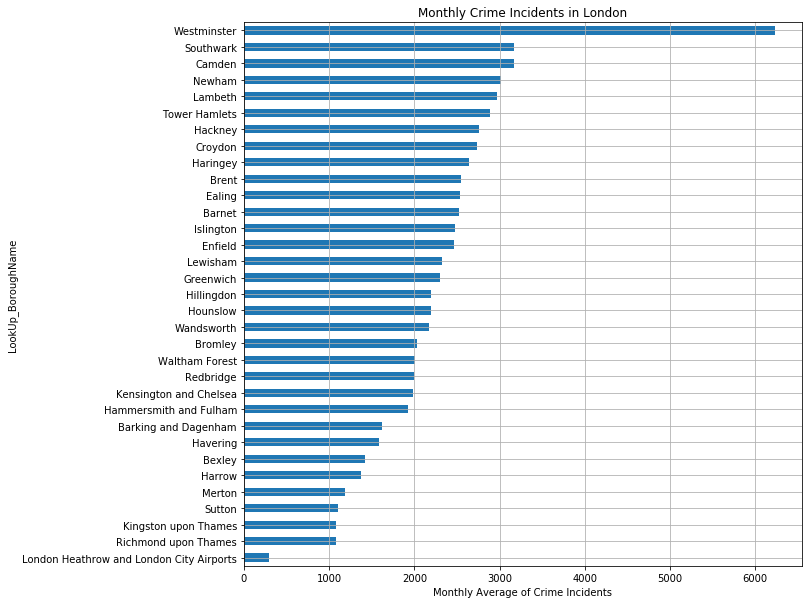

In [57]:
#Visualize crime data
df_data_1.set_index('LookUp_BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()


<p>According to the data above we can observe that Westminster has the biggest number of crime followed by  Southwark, Camden and Newham</p>

In [58]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
df_data_1.drop([22], inplace=True)

#Combine crime data and borough information data
df_data_1 = pd.merge(df_data_1,info, how='outer', on='LookUp_BoroughName')
df_data_1.head()

In [67]:
#Check data type
df_data_1.dtypes

LookUp_BoroughName     object
MonthlyAverage        float64
dtype: object

df_data_1['Population'] = pd.to_numeric(df_data_1['Population'])
df_data_1['Latitude'] = pd.to_numeric(df_data_1['Latitude'])
df_data_1['Longitude'] = pd.to_numeric(df_data_1['Longitude'])
df_data_1.dtypes

In [73]:
df_data_1.shape


(32, 2)

#Visualize crime per 1000 people
df_data_1.set_index('LookUp_BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [87]:
import folium
from geopy.geocoders import Nominatim

In [88]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 51.5073219, -0.1276474.


<h2>Cluster Analysis</h2>

In [94]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 179 uniques categories.


In [95]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [96]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,African Restaurant,Airport,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
onehot.shape


(1146, 180)

In [99]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00
1,Barnet,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00
2,Bexley,0.00000,0.0,0.0,0.034483,0.00,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.034483,0.00000,0.034483,0.00,0.00,0.00,0.00,0.00
3,Brent,0.00000,0.0,0.0,0.040000,0.00,0.000000,0.00,0.00,0.020000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00
4,Bromley,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.025641,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00
5,Camden,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,...,0.020000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00
6,Croydon,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.048780,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00
7,Ealing,0.00000,0.0,0.0,0.000000,0.00,0.020000,0.00,0.00,0.020000,...,0.000000,0.000000,0.020000,0.04000,0.000000,0.02,0.00,0.00,0.00,0.00
8,Enfield,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,...,0.040000,0.000000,0.020000,0.00000,0.000000,0.00,0.00,0.00,0.02,0.00
9,Greenwich,0.02381,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.023810,...,0.000000,0.000000,0.000000,0.02381,0.023810,0.00,0.00,0.00,0.00,0.00


In [100]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0        Bus Station  0.14
1               Pool  0.14
2        Supermarket  0.14
3        Golf Course  0.14
4  Martial Arts Dojo  0.14


----Barnet----
                 venue  freq
0                 Café   0.4
1             Bus Stop   0.2
2  Rental Car Location   0.2
3   Salon / Barbershop   0.2
4   African Restaurant   0.0


----Bexley----
                  venue  freq
0           Coffee Shop  0.10
1        Clothing Store  0.10
2                   Pub  0.10
3  Fast Food Restaurant  0.07
4              Pharmacy  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.06
3  Sporting Goods Shop  0.06
4        Grocery Store  0.06


----Bromley----
                  venue  freq
0        Clothing Store  0.13
1           Coffee Shop  0.13
2           Pizza Place  0.05
3                   Bar  0.05
4  Gym / Fitness Center  0.05


----Camden----
            venu

In [101]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Golf Course,Park,Gym / Fitness Center,Martial Arts Dojo,English Restaurant,Food Court,Flea Market
1,Barnet,Café,Salon / Barbershop,Bus Stop,Rental Car Location,Yoga Studio,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
2,Bexley,Pub,Coffee Shop,Clothing Store,Italian Restaurant,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Grocery Store,Plaza
3,Brent,Coffee Shop,Hotel,Sporting Goods Shop,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Bar,Restaurant,Outlet Store
4,Bromley,Coffee Shop,Clothing Store,Pizza Place,Gym / Fitness Center,Bar,Chocolate Shop,Bookstore,English Restaurant,Stationery Store,Department Store


In [125]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

grouped_clustering =grouped.drop('BoroughName', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 0, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
 #add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
# Cluster 0: Healthy area
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [ ]:
# Cluster 1: Lively area (Pubs, Restaurants)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [ ]:
# Cluster 3: Quiet area
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [ ]:
# Cluster 4: Traveller area
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [136]:
df_data_1 = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

KeyError: 'CrimeToPop'

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

In [ ]:
score = london_merged[['BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

In [142]:
# make a map of Toronto using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_data_1['Longitude'], df_data['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

NameError: name 'df_top5' is not defined